# Data Profiling - Dimensionality
Namely " _recognizing the number of records_ " and " _acknowledging the number of variables - usually known as data dimensionality_ "


## Heart Failure Dataset
_Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure._

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

### Load Data

In [2]:
data = pd.read_csv('../datasets/heart_failure_clinical_records_dataset.csv')

### Data Shape

In [3]:
no_entries = data.shape[0]
no_variables = data.shape[1]

no_variables = no_variables - 1 # Remove the target variable to get the ratio

entries2variables_ration = no_entries/no_variables

print('No. entries:', no_entries, '\nNo. variables:', no_variables)
print('Entries to Variables Ratio:', entries2variables_ration)

No. entries: 299 
No. variables: 12
Entries to Variables Ratio: 24.916666666666668


We now know the total number of entries in our data - **299** - and the total number of variables for each entry - **13** (12 + 1 Target Variable)

We also know that our Entries to Variable ratio is well over 1 (at **23**), meaning that if our data doesn't cover the entire domain, **it won't be due to lack of records**. We should keep that in mind when verifying the domain convergeance.

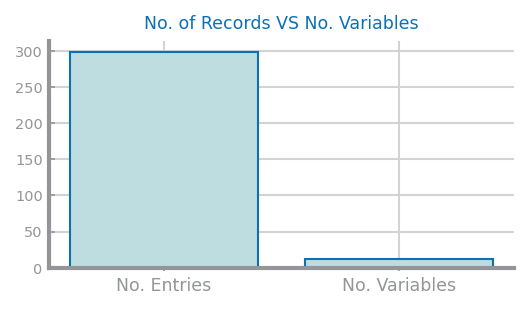

In [4]:
plt.figure(figsize=(4,2))
values = {'No. Entries': no_entries, 'No. Variables': no_variables}
ds.bar_chart(values.keys(), values.values(), title='No. of Records VS No. Variables')

### Variable Types

In [5]:
print("Variable Types:\n" + str(data.dtypes))

Variable Types:
age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


With this we now know that all of our variables (including the target variable) are **numeric**, with **9** of them being `int64` and **3** being `float64`, with the latter allowing for a wider range of values including decimals. All variables are theoretically capable of assuming positive or negative values.

Our Target Variable - DEATH_EVENT - is of type **int64**

### Missing Values

We will now analyze, for each variable, how many records exist that don't possess a value for it.

{'age': 0, 'anaemia': 0, 'creatinine_phosphokinase': 0, 'diabetes': 0, 'ejection_fraction': 0, 'high_blood_pressure': 0, 'platelets': 0, 'serum_creatinine': 0, 'serum_sodium': 0, 'sex': 0, 'smoking': 0, 'time': 0, 'DEATH_EVENT': 0}


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

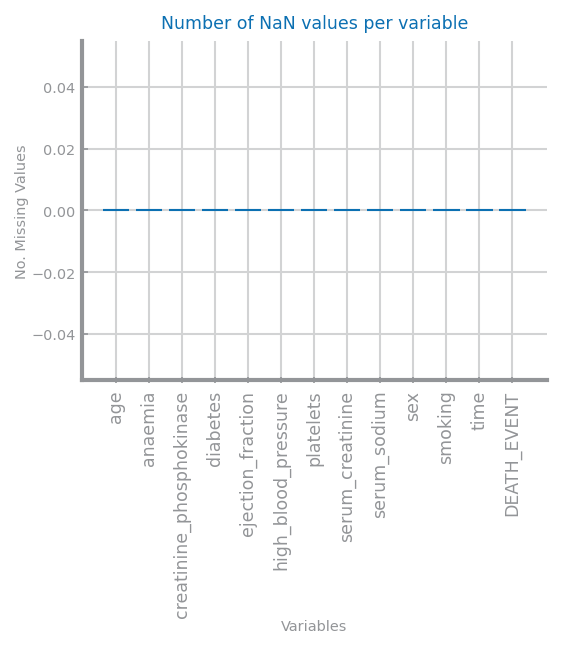

In [6]:
missing_values = {}
for var in data:
    missing_values[var] = data[var].isna().sum()
    
print(missing_values)

plt.figure()

ds.bar_chart(missing_values.keys(), missing_values.values(), title='Number of NaN values per variable',
               xlabel='Variables',
               ylabel='No. Missing Values')

plt.xticks(rotation=90)
#plt.ylim(bottom=0)

With this, we can rest assured that **all records have values for all variables**.

### Summary

**Number of Records**:
- 299

**Number of Variables**:
- 12 + 1 Target Variable

**Records to Variables Ration**:
- 23.0

**Different Types of Variables**:
- int64 (10)
- float64 (3)

**Number of Missing Values per Variable**:
- age - 0
- anemia - 0
- creatinine_phosphokinase - 0
- diabetis - 0
- ejection_fraction	- 0
- high_blood_pressure - 0
- platelets	- 0
- serum_creatinine - 0
- serum_sodium - 0
- sex - 0
- smoking - 0
- time - 0
- DEATH_EVENT - 0

**Additional Observations**:
- The Records to Variables ratio is well over 1
- All variables are numerica
- There exist absolutely no missing values
- The Target Value, as specified by the dataset, is the DEATH_EVENT variable and it is of type **int64**

## QSAR Oral Toxicity Dataset
_Data set containing values for 1024 binary attributes (molecular fingerprints) used to classify 8992 chemicals into 2 classes (very toxic/positive, not very toxic/negative)_
	
### Imports

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

### Load Data

In [8]:
data = pd.read_csv('../datasets/qsar_oral_toxicity.csv', sep=';', header=None)

### Data Shape

In [9]:
no_entries = data.shape[0]
no_variables = data.shape[1]

no_variables = no_variables - 1 # Remove the target variable to get the ratio

entries2variables_ration = no_entries/no_variables

print('No. entries:', no_entries, '\nNo. variables:', no_variables)
print('Entries to Variables Ratio:', entries2variables_ration)

No. entries: 8992 
No. variables: 1024
Entries to Variables Ratio: 8.78125


We now know the total number of entries in our data - **8992** - and the total number of variables for each entry - **1025** (1024 + 1 Target Variable)

We also know that our Entries to Variable ratio is over 1 (at **~8.78**), meaning that if our data doesn't cover the entire domain, **it won't be due to lack of records**. We should keep that in mind when verifying the domain convergeance.

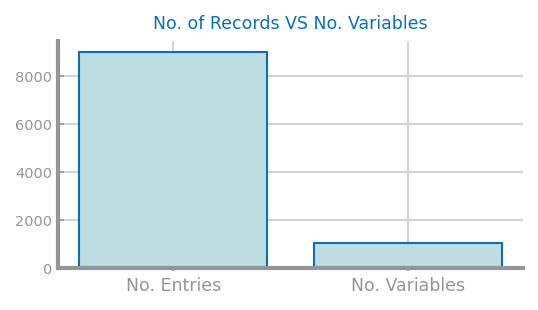

In [10]:
plt.figure(figsize=(4,2))
values = {'No. Entries': no_entries, 'No. Variables': no_variables}
ds.bar_chart(values.keys(), values.values(), title='No. of Records VS No. Variables')

### Variable Types

In [11]:
print("Variable Types:\n" + str(data.dtypes))

Variable Types:
0        int64
1        int64
2        int64
3        int64
4        int64
         ...  
1020     int64
1021     int64
1022     int64
1023     int64
1024    object
Length: 1025, dtype: object


With this we now know that all of our variables (excluding the target variable) are **numeric**, with **all** of them being `int64`. All variables are theoretically capable of assuming positive or negative values.

Our Target Value is of type **object**, and upon further analysis of the dataset we can see that it either takes the value _positive_ or _negative_ (i.e, its a string variable)

We should also point out that our variables aren't named as the dataset did not possess a _header_. As such, we'll be referring to each variable by the ordear it appears in the dataset, i.e it's index. As such our variables names will be 0, 1, 2, ..., 1023 with variable 1024 being our target variable.

### Missing Values

We will now analyze, for each variable, how many records exist that don't possess a value for it. We can't take the same approach as we did in the previous dataset due to the fact that we are now dealing with 1024 variables. As such what we can do is split these 1025 variables into ranges of 203 values. So we'll end up with 5 groups - 0-203, 203-405, and so on.

With this we can build a histogram, and see if for any of those ranges we have missing values. For the ranges that do present missing values we can then individually analyze that range by doing the same procedure.

{'0-255': 0, '256-511': 0, '512-767': 0, '768-1023': 0}


([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

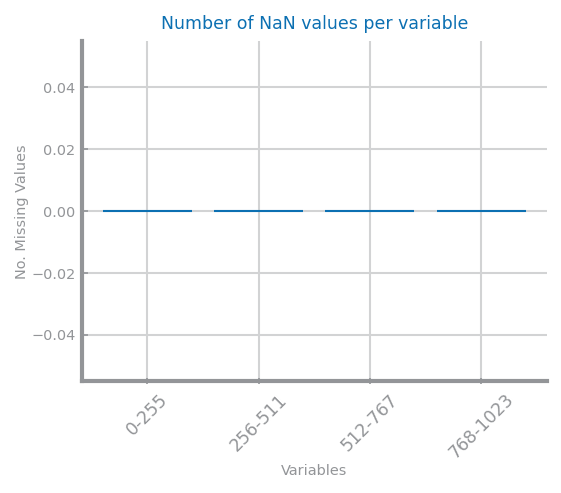

In [12]:
missing_values = {}

i = 0
temp_y = 0
start = 0
for var in data:
    temp_y += data[var].isna().sum()
    if i == 255:
        i = 0
        missing_values[str(start) + "-" + str(var)] = temp_y
        start = var+1
    else:
        i+=1
        

print(missing_values)

plt.figure()

ds.bar_chart(missing_values.keys(), missing_values.values(), title='Number of NaN values per variable',
               xlabel='Variables',
               ylabel='No. Missing Values')

plt.xticks(rotation=45)
#plt.ylim(bottom=0)

Since none of our ranges claim to have missing values, we don't need to analyze any of them further and can conclude that none of our variables have missing values.

Alternatively we could have instead divided our variables into 41 groups of 25 variables each as so.

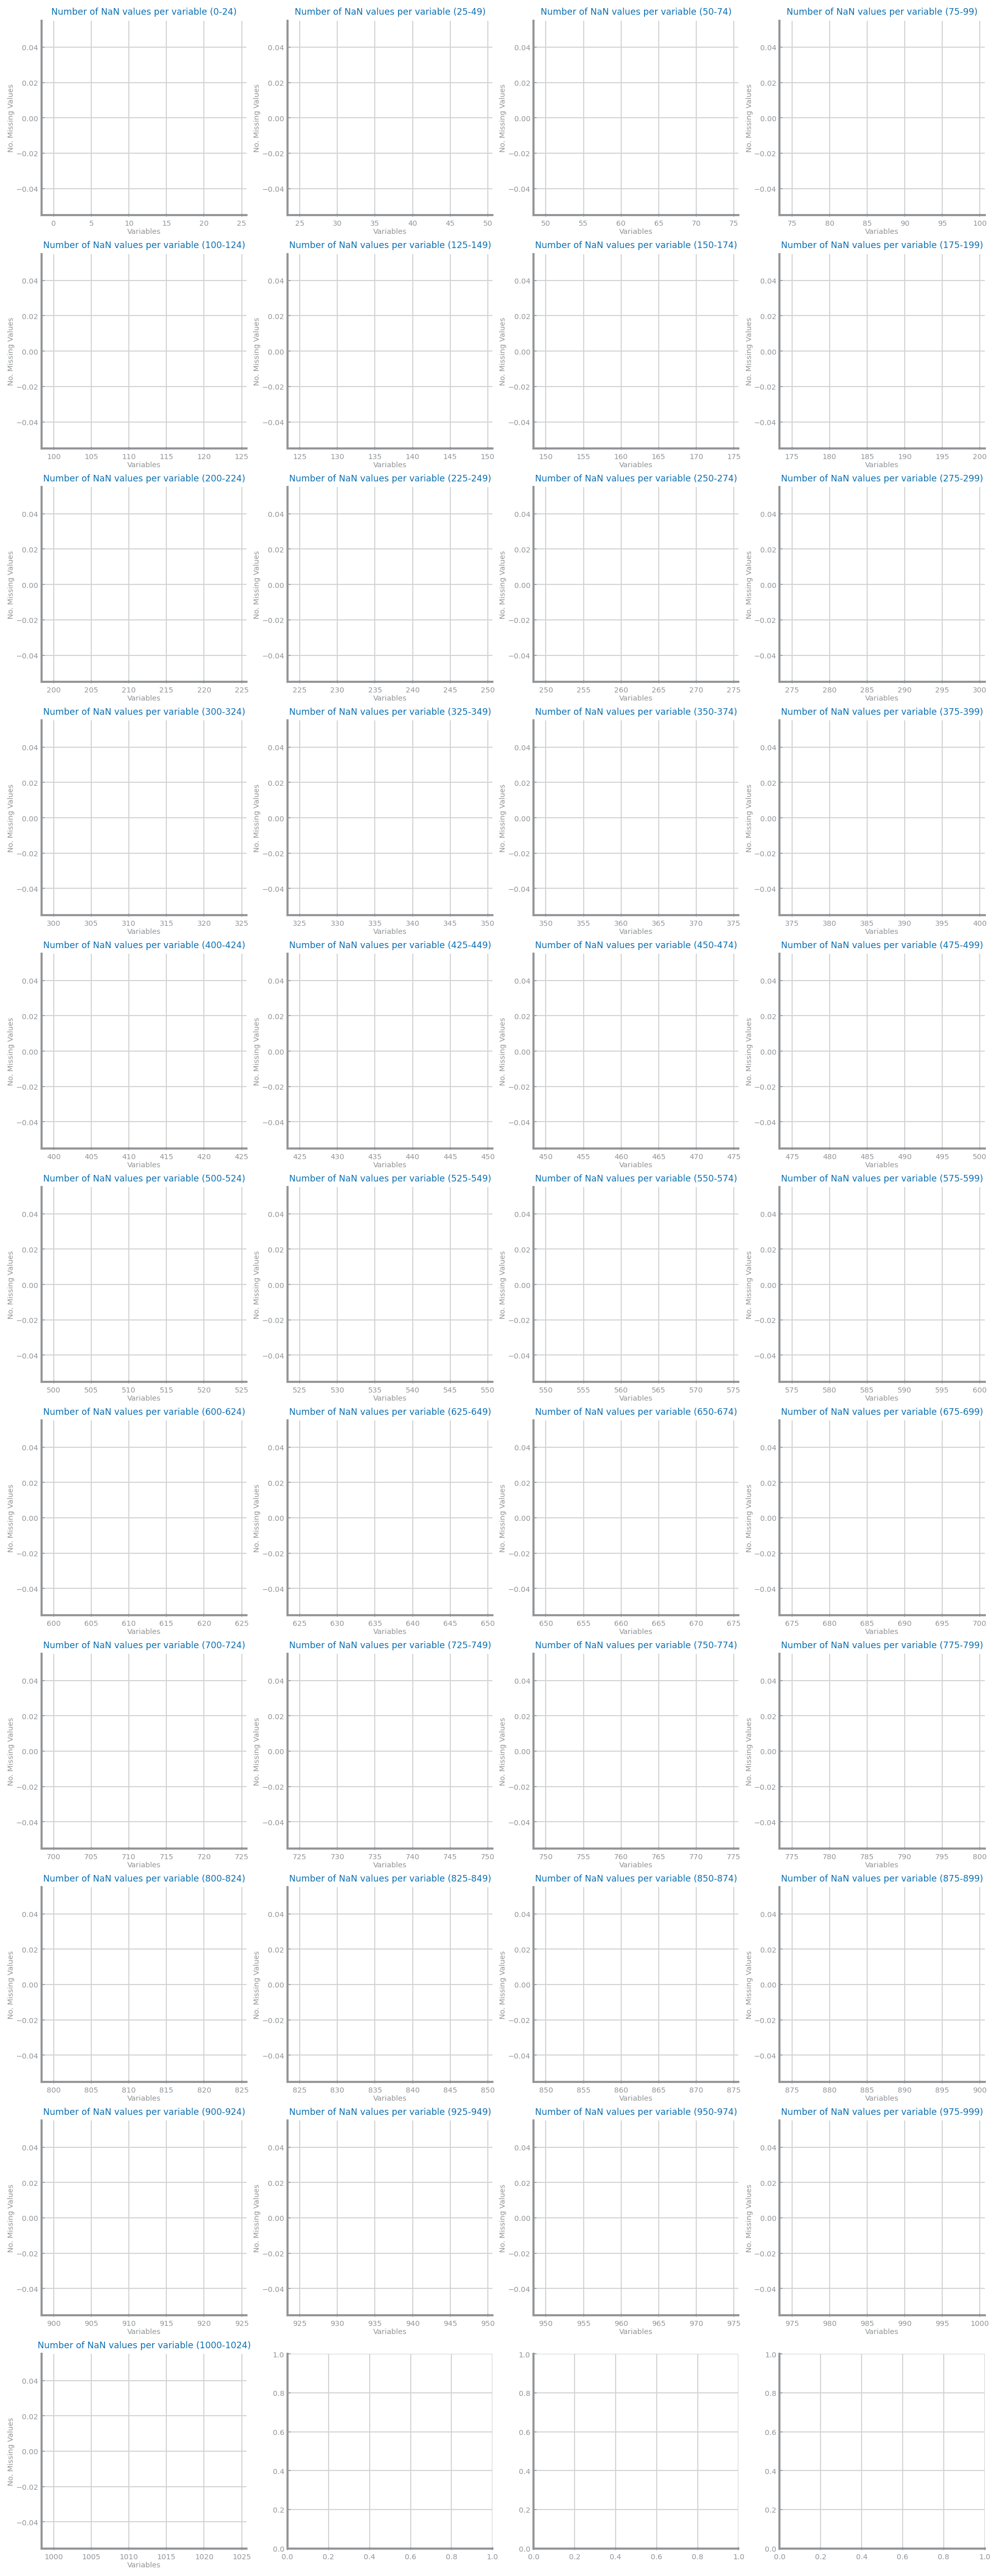

In [13]:
missing_values = {}

i = 0

row = 0
fig, axs = plt.subplots(11, 4, figsize=(4*ds.HEIGHT, 11*ds.HEIGHT))

iter_row, iter_col = 0, 0

for var in data:
    missing_values[var] = data[var].isna().sum()
    
    if i == 24:
        interval = "(" + str(list(missing_values.keys())[0]) + "-" + str(var) + ")"
        axs[iter_row, iter_col].set_title('Number of NaN values per variable ' + interval)
        axs[iter_row, iter_col].set_xlabel("Variables")
        axs[iter_row, iter_col].set_ylabel('No. Missing Values')
        
        axs[iter_row, iter_col].bar(missing_values.keys(), missing_values.values())
        
        i = 0
        missing_values = {}
                                    
        iter_row, iter_col = (iter_row + 1, 0) if iter_col == 3 else (iter_row, iter_col + 1)
    else:
        i+=1
    
        

#plt.xticks(rotation=45)
#plt.ylim(bottom=0)

With this, we can rest assured that **all records have values for all variables**.

### Summary

**Number of Records**:
- 8992

**Number of Variables**:
- 1024 + 1 Target Variable

**Records to Variables Ration**:
- ~8.78

**Different Types of Variables**:
- int64 
- object (Target Variable is a String)

**Number of Missing Values per Variable**:
- No missing values for any variable, including the target value

**Additional Observations**:
- The Records to Variables ratio is over 1
- All variables are numerical and **int64** except for the Target Variable.
- There exist absolutely no missing values

- The Target Value, as specified by the dataset, is the last variable, 1024, and it is of type **object** and assumes either _positive_ or _negative_

## REDUCED QSAR Oral Toxicity Dataset
_Data set containing values for 32 binary attributes (molecular fingerprints) used to classify 8992 chemicals into 2 classes (very toxic/positive, not very toxic/negative)_

### Reduce Dimensionality

Since this dataset has too many variables to be properly analyzed, we decided to reduce it's dimensionality. Since all of the 1024 variables (not counting target) consist in binary values we decided to reduce the number of variables by splitting them into 32 groups of 32 bits. The following code creates a CSV with the reduced dataset

In [14]:
import csv

with open('../datasets/qsar_oral_toxicity.csv', newline='') as original_data:
    with open('../datasets/oral_reduced/ORAL_reduced32.csv', 'w', newline='') as reduced_data:
        reader = csv.reader(original_data, delimiter=';')
        writer = csv.writer(reduced_data, delimiter=';')
        for row in reader:
            new_row = []

            i = 0
            new_var = ""
            for bit in row:
                new_var += bit
                if i == 31:
                    new_row.append(new_var)  
                    
                    new_var = ""
                    i = 0
                else:
                    i+=1
                    
            new_row.append(row[-1]) #Append the target variable
                    
            writer.writerow(new_row)
                

### Imports

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

### Load Data

In [16]:
data = pd.read_csv('../datasets/oral_reduced/ORAL_reduced32.csv', sep=';', header=None)

### Data Shape

In [17]:
no_entries = data.shape[0]
no_variables = data.shape[1]

no_variables = no_variables - 1 # Remove the target variable to get the ratio

entries2variables_ration = no_entries/no_variables

print('No. entries:', no_entries, '\nNo. variables:', no_variables)
print('Entries to Variables Ratio:', entries2variables_ration)

No. entries: 8992 
No. variables: 32
Entries to Variables Ratio: 281.0


We now know the total number of entries in our data - **8992** - and the total number of variables for each entry - **33** (32 + 1 Target Variable)

We also know that our Entries to Variable ratio is well over 1 (at **~281.0**), meaning that if our data doesn't cover the entire domain, **it won't be due to lack of records**. We should keep that in mind when verifying the domain convergeance.

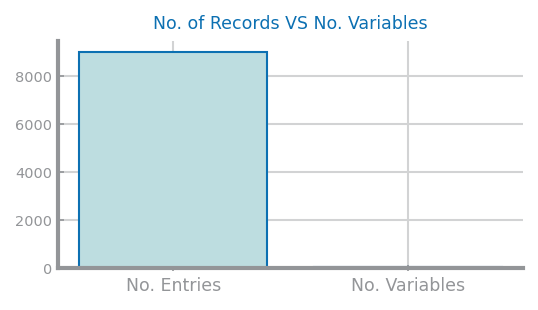

In [18]:
plt.figure(figsize=(4,2))
values = {'No. Entries': no_entries, 'No. Variables': no_variables}
ds.bar_chart(values.keys(), values.values(), title='No. of Records VS No. Variables')

### Variable Types

In [19]:
print("Variable Types:\n" + str(data.dtypes))

Variable Types:
0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
20    object
21    object
22    object
23    object
24    object
25    object
26    object
27    object
28    object
29    object
30    object
31    object
32    object
dtype: object


With this we now know that all of our variables (including the target variable) are **objects**, with **all** of them being basically strings in which each character corresponds to a bit (i.e, we joined each of the variable's in each 32-element grouping into a string and placed them under one single variable).

The exception to this is the Target Variable, variable number 32, which is also an **object** but rather than assuming a value like "00100010...", it is either _positive_ or _negative_.

We should also point out that our variables aren't named as the dataset did not possess a _header_. As such, we'll be referring to each variable by the ordear it appears in the dataset, i.e it's index. As such our variables names will be 0, 1, 2, ..., 32 with variable 32 being our target variable.

### Missing Values

We will now analyze, for each variable, how many records exist that don't possess a value for it.

{'0': 0, '1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0, '10': 0, '11': 0, '12': 0, '13': 0, '14': 0, '15': 0, '16': 0, '17': 0, '18': 0, '19': 0, '20': 0, '21': 0, '22': 0, '23': 0, '24': 0, '25': 0, '26': 0, '27': 0, '28': 0, '29': 0, '30': 0, '31': 0, '32': 0}


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 <a list of 33 Text major ticklabel objects>)

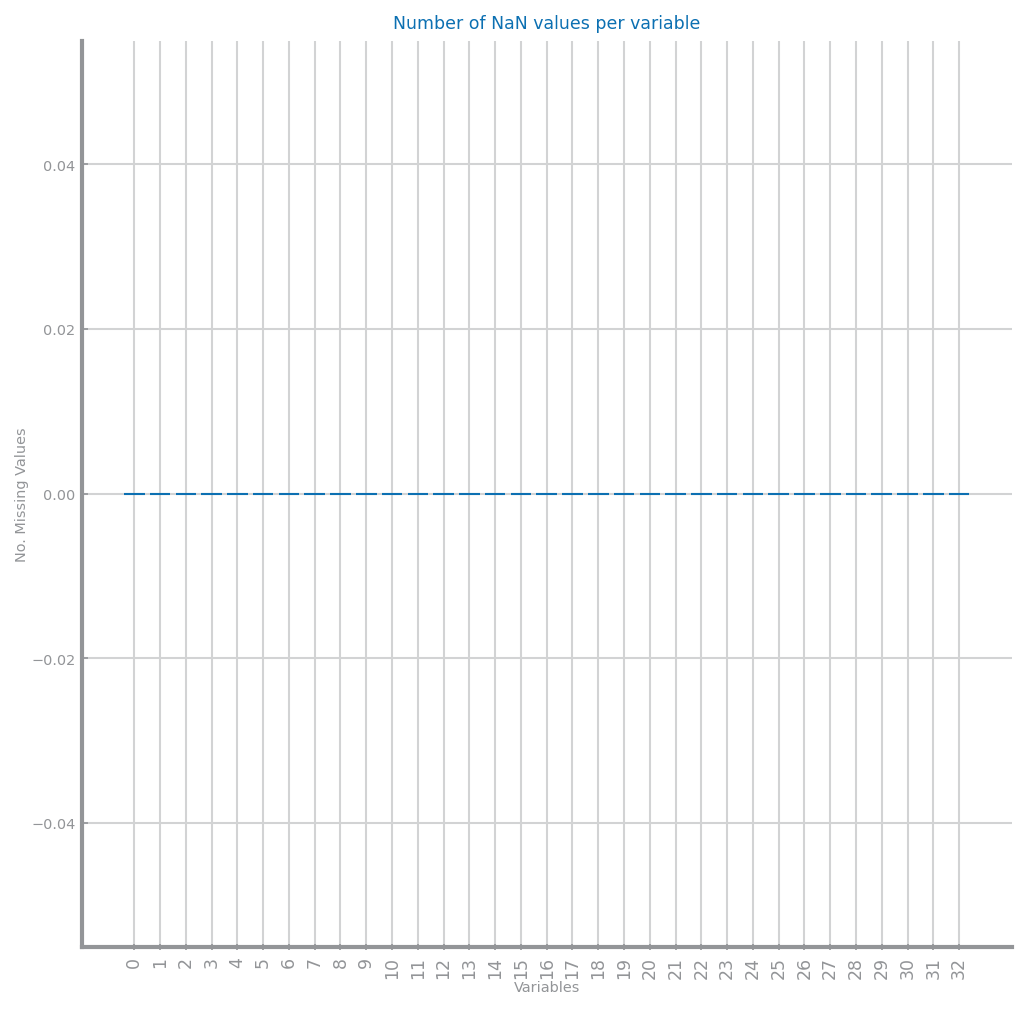

In [20]:
missing_values = {}
for var in data:
    missing_values[str(var)] = data[var].isna().sum()
    
print(missing_values)

plt.figure(figsize=(8,8))

ds.bar_chart(missing_values.keys(), missing_values.values(), title='Number of NaN values per variable',
               xlabel='Variables',
               ylabel='No. Missing Values')

plt.xticks(rotation=90)
#plt.ylim(bottom=0)

With this, we can rest assured that **all records have values for all variables**.

### Summary

**Number of Records**:
- 8992

**Number of Variables**:
- 32 + 1 Target Variable

**Records to Variables Ration**:
- 281.0

**Different Types of Variables**:
- object

**Number of Missing Values per Variable**:
- No missing values for any variable, including the target value

**Additional Observations**:
- The Records to Variables ratio is over 1
- All variables are **objects**
- There exist absolutely no missing values

- The Target Value, as specified by the dataset, is the last variable, 32, and it is of type **object**, but unlike all other variables which assume values like _010010100..._ , it is either _positive_ or _negative_